---
title: Rotavibrational Analysis of the Infrared Spectrum of HCl/DCl
authors:
  - name: Author Name
    email: example@cuny.edu
    affiliations:
      - ror: 00g2xk477
      - institution: CUNY – Hunter College
      - department: Chemistry
date: 2024-01-01
numbering:
  heading_2: true
  heading_3: true
---

The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose

Given a reference spectrum of a mixture of HCl and DCl, we will do a rotavibrational analysis of the peaks, identifying the isotopic contributions of four different species ({sup}`1`H{sup}`35`Cl, {sup}`1`H{sup}`37`Cl, {sup}`2`H{sup}`35`Cl, and {sup}`2`H{sup}`37`Cl) and correlating the measured constants with calculated constants obtained from _ab initio_ calculations run in Gaussian16. 

## Methodology
Quickly describe assumptions and processing steps.


## Setup

### Library import
We import all the required Python libraries

In [2]:
# Directory searching
from pathlib import Path

# Data manipulation
import numpy as np
import scipy as sp

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-ticks')
from tabulate import tabulate

# Psi4 library
import psi4
# Set scratch directory to scratch partition
psi4_io = psi4.core.IOManager.shared_object()
psi4_io.set_default_path('/scratch-data2/jupyter')
for x in Path().glob("psi.*.clean"): x.unlink() 

psi4.core.be_quiet()

### Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

## Data import
We retrieve all the required data for the analysis.

In [3]:
# These two files were taken as one continuous collection using a Nicolet iS5
# FTIR spectrometer. Sample details can be found in the instruction manual.
raw_data = {}

for file in Path('raw_spectra').glob('*.csv'):
    raw_data[file.stem] = np.genfromtxt(file, 
                             delimiter=',', 
                             skip_header=5, 
                             names=['nm', 'Data'])

hcl_spectrum, dcl_spectrum = raw_data.values()
hcl_spectrum

array([(2650.  , 0.0244), (2650.12, 0.0251), (2650.25, 0.0252), ...,
       (3099.75, 0.0245), (3099.88, 0.0241), (3100.  , 0.0238)],
      dtype=[('nm', '<f8'), ('Data', '<f8')])

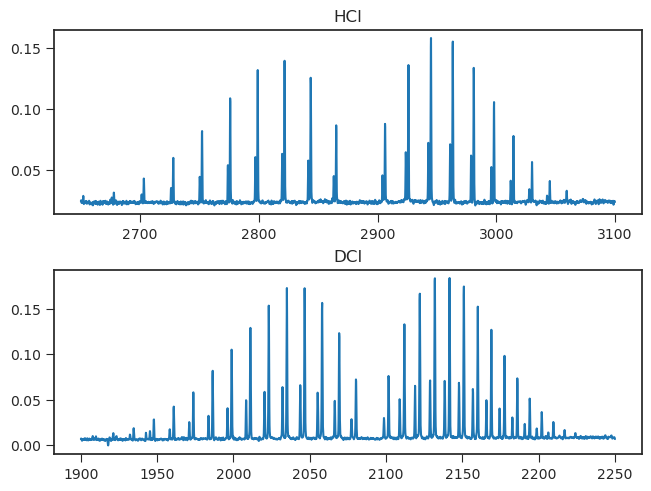

In [4]:
# Constrained layout includes room for titles in plot area
fig, axs = plt.subplots(2, 1, layout="constrained") 
axs[0].plot(hcl_spectrum['nm'], hcl_spectrum['Data'], label='HCl')
axs[0].set_title('HCl')
axs[1].plot(dcl_spectrum['nm'], dcl_spectrum['Data'], label='DCl')
axs[1].set_title('DCl')
fig.show()

## Data processing
Put here the core of the notebook. Feel free to further split this section into subsections.

## Bond length analysis

Begin by running Psi4 scans on the bond length using the method demonstrated on the hydrogen fluoride molecule in the Computational Chemistry lab. Look at the structure of the input, duplicate it, then run three calculations using the following methods (redefine `method` for each simulation, or run a loop over a list of `method` values):

|  Method Type    | Psi4 Keyword |
| :-------------  | :----------- |
| Hartree-Fock    |  `HF`        |
| Hybrid PT       |  `REMP2`     |
| DFT             |  `PBE0`      |

In [1]:
#Fill in the appropriate code from the manual below


In the next cell, we'll set up four new molecules to perform an anharmonic frequency analysis. Psi4 will fit a potential well to extract the rotational and vibrational parameters for the molecule. The output of the `psi4.diatomic.anharmonicity()` function is a dictionary containing all the parameters describing the given diatomic molecule. 

Assuming you have an array called `r_vals` already assigned and a folder called `outputs` exists in your notebook folder, you can use the code below to calculate all the anharmonicity parameters for the molecule called `h35cl` (assigned above). As you are performing this four times, you might consider adding the constant dictionary as an entry in another wrapping dictionary where each key in the outer dictionary is the name of an isotopologue, _e.g.,_ `hcl_data['h35cl'] = psi4.diatom…`. 
:::{code}python
energies = []
for r in r_vals:
    h35cl.r = r
    h35cl.update_geometry()
    e = psi4.energy('hf/'+basis, molecule=h35cl)
    print(r, e)
    energies.append(e)
    
psi4.diatomic.anharmonicity(r_vals, energies, plot_fit=f'outputs/{string}_plot.png')
:::

In [2]:
# Add your anharmonicity code below and save the output dictionaries for each. 

## Analysis of {sup}`1`HCl Spectra

This next cell is where some of the routines in the `scipy` package can really shine. We could open these spectra in Excel and try to pick out the peak maxima by hand, hoping that we really grabbed the peak and didn't miss a step, but this is a problem ripe for automation. The `scipy.signal` library contains the [`find_peaks`][sp-find_peaks] function which allows us to automatically grab peaks. The automation can be trained on a number of parameters. We'll use the `prominence` and `height` parameters to exclude "peaks" in the baseline and keep us from grabbing peaks that are too close to each other (_i.e.,_ if a peak has a slight shoulder, both points might be chosen). 

When you execute the cell below, you should see a plot of the HCl region of the spectrum. If you play with the parameters for `prominence` and `height`, you should be able to select most of the peaks (they're all stored in the list `peaks_hcl` that you create on the third line). You will probably need to execute the cell multiple times (every time you change a parameter). 

The second two calls to `plt.plot` select a slice of the spectrum based on the location of the `peaks_hcl` list and plot only the points in that slice. Adjust the start and stop points of the slice as required to get matching sets of peaks for the two isotopes (_i.e.,_ peaks with the same _J_ values). If your smaller peaks run from $m=-10$ to $9$, then your larger peaks should span that same range. 

[sp-find_peaks]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

In [ ]:
# Extract peak locations from HCl spectra
from scipy.signal import find_peaks, peak_prominences
peaks_hcl, _ = find_peaks(hcl_spectrum['Data'],
                     prominence= , # Start with .01, adjust from there
                     height= )  # Start just above the baseline of your spectrum
print(len(peaks_hcl)) # Tells us how many total peaks were found


# We'll plot the spectrum along with the peaks we found. Note the steps
# in the peaks list. We know that there are two isotopes and that they 
# should be every other peak, so we step by 2. List slicing (or stepping)
# is done with [start:stop:step]. You may need to adjust the start and stop
# points to get a good group. Try to get the same pairs for your peaks so 
# your lists are the same length. 
plt.plot(hcl_spectrum['nm'], hcl_spectrum['Data'])
plt.plot(hcl_spectrum.iloc[peaks_hcl[0:-1:2]], # Select the even peaks
         marker='.', 
         color='red',
         linewidth=0)
plt.plot(hcl_spectrum.iloc[peaks_hcl[1:-1:2]], # Select the odd peaks
         marker='.', 
         color='orange',
         linewidth=0)
plt.show()

Now that you've selected your peaks, it's time to assign the peak wavenumbers to a new list and match them to our _m_ values for analysis. You'll need to inspect your plot and figure out which _m_ values are represented. Hopefully your list is roughly symmetric. Remember that there is no peak for $ m = 0 $, so we'll be removing that value (see the modification of `m_values` below). 

Once you create the list of _m_ values, you need to assign the plotted peaks from the previous cell. Fill in the slice values below. 

In [ ]:
# Assign peak wavelengths to dataframe
m_values = np.arange(-9,10)
m_values = m_values[m_values != 0]
hcl_data = {'m': m_values,
            'H35Cl': hcl_spectrum.iloc[peaks_hcl[::2]].index.values,
            'H37Cl': hcl_spectrum.iloc[peaks_hcl[::2]].index.values}
print(m_values)
# Create a dataframe from our assigned values
hcl_peak_data = pd.DataFrame(data=hcl_data)

hcl_peak_data

As instructed, you need to look at the difference between your peak energies. The DataFrame method `diff()` does exactly this by default (takes the difference between successive rows). Note the progression of values, comment on this in your discussion with respect to your calculated value for $ B_e $. 

In [ ]:
# Print difference between peaks scaled by difference in m values
print('Mean values:\n',hcl_peak_data[['H35Cl','H37Cl']].diff().div(hcl_peak_data['m'].diff(), axis=0).mean())
hcl_peak_data[['H35Cl','H37Cl']].diff().div(hcl_peak_data.m.diff(), axis=0)

Now you need to plot the two series of peaks vs. $m$ values. 

In [ ]:
# Plot 'm' vs peak location
hcl_peak_data.plot(x='m', y=['H35Cl','H37Cl'], marker='.', linewidth=0);

At this point, we'll use the `curve_fit` routine from `scipy.optimize`. The statistics for the curve fit are given as a [covariance matrix][cov-mat]. The diagonal elements are the variance of the individual elements (fit parameters, the polynomial coefficients in this case). To get out the standard errors, we need to take the square root of the diagonal elements of that matrix (line 11). For more details and an example, see the [documentation page][sp-curve_fit].

[sp-curve_fit]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
[cov-mat]: https://en.wikipedia.org/wiki/Covariance_matrix

In [ ]:
from scipy.optimize import curve_fit

# Create model function for \nu(m). Can be kept for later fits
def nu(m, nu0, B_e, A_e, D_J):
    return nu0 + ((2 * B_e - 2 * A_e) * m) - (A_e * m ** 2) - (4* D_J * m ** 3)

# Fit the H35Cl data, store the fit coefficients and covariance matrix
h35cl_coeff, h35cl_cov = curve_fit(nu, hcl_peak_data['m'], hcl_peak_data['H35Cl'])

# Diagonal elements are the variance of the fit parameters, \sigma^2
h35cl_fit_err = np.sqrt(np.diag(h35cl_cov)) 
print(h35cl_coeff,'\n', h35cl_fit_err)

# Plot our resultant fit agains the original data as a check
plt.plot(hcl_peak_data['m'], nu(hcl_peak_data['m'], *h35cl_coeff), 'b-',
         hcl_peak_data['m'], hcl_peak_data['H35Cl'], 'rd')

# Provide a legend that states the fit parameters. 
# LaTeX elements can be included by wrapping them in $…$
plt.legend(['fit, coefficients:\n' + 
            f'$\\nu_0=${h35cl_coeff[0]:1.2f}, $B_e=${h35cl_coeff[1]:1.2f},\n' + 
            f'$\\alpha_e=${h35cl_coeff[2]:1.4}, $D_J=${h35cl_coeff[3]:1.3e}', 
            '$^1$H$^{35}$Cl experimental'],loc='lower right')

Now repeat these steps on H<sup>37</sup>Cl. 

## Analysis of {sup}`2`HCl Spectra

Repeat the previous steps for the deuterium chloride spectrum. Append the list of constants to the `hcl_con_dict` object. 

## Calculation of molecular constants

Now is the time to calculate all of the constants from the lab manual. You can call the fit parameters from the previous cell the same way they're called in the legend block (`coeff[n]`). You'll need to use these values to calculate the other values ($ \nu_e, \nu_e\chi_e, k $). I suggest storing them in a dictionary (`dict()` or `{}`) so that you can append the values for each successive molecule using the syntax shown in the final line of the cell.

You'll need to calculate all of the constants listed in the lab manual, then extend your coefficient list with those values (line 7 in the second cell below). Then you need to add this list of values to the dictionary (created in the'Import' section) with a new key (a molecule identifier works well). If you don't think you can calculate a value for a particular constant (should be two values per molecule), set it equal to `np.nan`. This makes sure that there is an entry in your data table, even if it's just an "empty" cell.

In [ ]:
# Calculate values for \nu_e, \nu_e\chi_e, k (force constant)

# Convert coefficients to a list of values, then add your new values to the list
# h35cl_vals will be used to create an entry (row) in your dictionary of constants
h35cl_vals = h35cl_coeff.tolist()
h35cl_vals.extend([
    #Insert list of values or variables for nu_e, k, etc.
])

# Add an entry to the dictionary for your first molecule. 
# This creates a new key ('H35Cl') and assigns h35cl_vals to that key. 
# Make sure you keep the order you assigned above
hcl_con_dict['H35Cl'] =  h35cl_vals

You should repeat this process for your theoretical molecules (all four of them), assigning the variables in the same order.

## Comparison of Experimental and Computational Constants

You should now be able to combine your computational and experimental dictionaries for display. The `tabulate` function (imported above) will allow you to display a dictionary as an HTML table, which you can embed within a Markdown cell in your report. 

## Additional Calculations

At this point, you should be able to complete any additional calculations requested in the lab manual on your own. 

## Results and Discussion

After completing the calculations, write up a discussion on your results. You should include a few select figures (the plots of the spectrum with chosen peaks might be good, as are plots of $m$ vs $\nu(m)$). Add any references used below. 

If you have trouble with the Python code, it's worth having a look at the documentation. Each of the packages used has a wealth of documentation ([NumPy][np], [SciPy][sp], [Matplotlib][mpl], and [StackExchange][sx] has a wealth of knowledge (answers are often in the top of search results for a given topic). If you're still having problems, feel free to ask your classmates in the Teams channel for the lab (text or voice/screensharing). I'm also happy to try to help, but you'll be at the mercy of my schedule, which might be hectic for the next week or so. 

Before turning this lab in to the submissions folder, please clean up the notebook. Feel free to delete any cells that seem unnecessary (such as this one). 

[np]: https://numpy.org/
[sp]: https://scipy.org/
[mpl]: https://matplotlib.org/
[sx]: http://www.stackexchange.com/

## References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2